<a href="https://colab.research.google.com/github/Er-AI-GK/LeetCode_Problems/blob/main/MLT_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIND S ALGORITHM

In [1]:
# Find-S Algorithm

import csv
def loadcsv(book1):
    lines=csv.reader(open("/content/drive/MyDrive/Colab Notebooks/MLT LAB/data1.csv", "r"));
    dataset= list(lines)
    headers= dataset.pop(0)
    return dataset, headers
def print_hypothesis(h):
    print('<',end='')
    for i in range(0,len(h)-1):
        print(h[i],end=',')
    print('>')
        
def findS():
    dataset,features=loadcsv('/content/drive/MyDrive/Colab Notebooks/MLT LAB/data1.csv')
    rows=len(dataset);
    cols=len(dataset[0]);
            
    flag=0
    for x in range(0,rows):
        t=dataset[x]
                
        if t[-1]=='1'and flag==0:
            flag=1
            h=dataset[x]
        elif t[-1]=='1':
            for y in range(cols):
                    if h [y]!=t[y]:
                        h[y]='?'
        #print("Training instance{0}the hypothesis is:".format (x+1),end='')
                                
        #print_hypothesis(h)
    print("The maximally specific hypothesis for a given training examples")
    #print(h)
    print_hypothesis(h)
findS()


The maximally specific hypothesis for a given training examples
<Sunny,warm,?,strong,?,?,>


CANDIDATE ELIMINATION

In [3]:
import csv

def get_domains(examples):
    d = [set() for i in examples[0]]
    for x in examples:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)

def fulfills(example, hypothesis):
# the implementation is the same as for hypotheses:
    return more_general(hypothesis, example)
def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0'else x[i]
    return [tuple(h_new)]

def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results

def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
            if not fulfills(x, s):
                S.remove(s)
                Splus = min_generalizations(s, x)
                ## keep only generalizations that have a counterpart in G
                S.update([h for h in Splus if any([more_general(g,h)for g in G])])
                ## remove hypotheses less specific than any other in S
                S.difference_update([h for h in S if
                                     any([more_general(h, h1) for h1 in S if h != h1])])
    return S

def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
            if fulfills(x, g):
                G.remove(g)
                Gminus = min_specializations(g, domains, x)
                ## keep only specializations that have a conuterpart in S
                G.update([h for h in Gminus if
                          any([more_general(h, s)for s in S])])
                ## remove hypotheses less general than any other in G
                G.difference_update([h for h in G if
                                     any([more_general(g1, h) for g1 in G if h != g1])])
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    n = len(domains)
    G = set([("?",)*n])
    S = set([("0",)*n])
    print("Maximally specific hypotheses - S ")
    print("Maximally general hypotheses - G ")
    i=0
    print("\nS[0]:",str(S),"\nG[0]:",str(G))
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]
        # Splitting data into attributes and decisions
        if cx=='Y': # x is positive example
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else: # x is negative example
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
            print("\nS[{0}]:".format(i),S)
            print("G[{0}]:".format(i),G)
    return
with open('/content/drive/MyDrive/Colab Notebooks/MLT LAB/data1.csv') as csvFile:
    examples = [tuple(line) for line in csv.reader(csvFile)]

candidate_elimination(examples)


Maximally specific hypotheses - S 
Maximally general hypotheses - G 

S[0]: {('0', '0', '0', '0', '0', '0')} 
G[0]: {('?', '?', '?', '?', '?', '?')}

S[1]: {('0', '0', '0', '0', '0', '0')}
G[1]: {('?', '?', '?', '?', '?', '?')}

S[2]: {('0', '0', '0', '0', '0', '0')}
G[2]: {('?', '?', '?', '?', '?', '?')}

S[3]: {('0', '0', '0', '0', '0', '0')}
G[3]: {('?', '?', '?', '?', '?', '?')}

S[4]: {('0', '0', '0', '0', '0', '0')}
G[4]: {('?', '?', '?', '?', '?', '?')}

S[5]: {('0', '0', '0', '0', '0', '0')}
G[5]: {('?', '?', '?', '?', '?', '?')}



EXNO 3 - ID3 ALGORITHM

In [ ]:
import numpy as np
import math
import csv

def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""
       
    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)    
   
    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1
               
    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1      
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)
       
    return items, dict

def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0
   
    counts = np.zeros((items.shape[0], 1))
    sums = 0
   
    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)

    for count in counts:
        sums += -1 * count * math.log(count, 2)
    return sums

def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False)
               
    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))
   
    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)
       
    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)
   
    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]
       
    return total_entropy / iv

def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node
       
    gains = np.zeros((data.shape[1] - 1, 1))
   
    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)
       
    split = np.argmax(gains)
   
    node = Node(metadata[split])    
    metadata = np.delete(metadata, split, 0)    
   
    items, dict = subtables(data, split, delete=True)
   
    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))
   
    return node

def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)

metadata, traindata = read_data("/content/drive/MyDrive/Colab Notebooks/MLT LAB/data3.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)



 Humidity
    high
       b'yes'
    normal
       Temperature
          b'cool'
             b'no'
          b'hot'
             b'no'
          b'mild'
             b'yes'


# EXNO - 4 : BASIC BACK PROPAGATION 

In [ ]:
import numpy as np # numpy is commonly used to process number array

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) # Features ( Hrs Slept, Hrs Studied)
y = np.array(([92], [86], [89]), dtype=float) # Labels(Marks obtained)

X = X/np.amax(X,axis=0) # Normalize
y = y/100

def sigmoid(x):
    return 1/(1 + np.exp(-x))
def sigmoid_grad(x):
    return x * (1 - x)

# Variable initialization
epoch=1000 #Setting training iterations
eta =0.2 #Setting learning rate (eta)
input_neurons = 2 #number of features in data set
hidden_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

# Weight and bias - Random initialization
wh=np.random.uniform(size=(input_neurons,hidden_neurons)) # 2x3
bh=np.random.uniform(size=(1,hidden_neurons)) # 1x3
wout=np.random.uniform(size=(hidden_neurons,output_neurons)) # 1x1
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    #Forward Propogation
    h_ip=np.dot(X,wh) + bh # Dot product + bias
    h_act = sigmoid(h_ip) # Activation function
    o_ip=np.dot(h_act,wout) + bout
    output = sigmoid(o_ip)

#Backpropagation
# Error at Output layer
Eo = y-output # Error at o/p
outgrad = sigmoid_grad(output)
d_output = Eo* outgrad # Errj=Oj(1-Oj)(Tj-Oj)

# Error at Hidden later
Eh = d_output.dot(wout.T) # .T means transpose
hiddengrad = sigmoid_grad(h_act) # How much hidden layer wts contributed to error
d_hidden = Eh * hiddengrad
wout += h_act.T.dot(d_output) *eta # Dotproduct of nextlayererror and currentlayerop
wh += X.T.dot(d_hidden) *eta

print("Normalized Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Normalized Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.82734341]
 [0.81715426]
 [0.82279745]]


# EXNO - 5 :  NAIVE BAYESIAN CLASSIFIER

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MLT LAB/pima_indian.csv")
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

#splitting the dataset into train and test data

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)

print ('\n the total number of Training Data :',ytrain.shape)
print ('\n the total number of Test Data :',ytest.shape)


# Training Naive Bayes (NB) classifier on training data.

clf = GaussianNB().fit(xtrain,ytrain.ravel())
predicted = clf.predict(xtest)
predictTestData= clf.predict([[6,148,72,35,0,33.6,0.627,50]])

#printing Confusion matrix, accuracy, Precision and Recall

print('\n Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))

print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,predicted))

print('\n The value of Precision', metrics.precision_score(ytest,predicted))

print('\n The value of Recall', metrics.recall_score(ytest,predicted))

print("Predicted Value for individual Test Data:", predictTestData)


 the total number of Training Data : (514, 1)

 the total number of Test Data : (254, 1)

 Confusion matrix
[[132  24]
 [ 44  54]]

 Accuracy of the classifier is 0.7322834645669292

 The value of Precision 0.6923076923076923

 The value of Recall 0.5510204081632653
Predicted Value for individual Test Data: [1]


# EXNO - 6DOCUMENT CLASSIFICATION

In [ ]:
import pandas  as  pd
msg=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLT LAB/Data6.csv',names=['message','label'])
#Tabular form data
print('Total instances in the dataset:',msg.shape[0])

msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
Y=msg.labelnum

print('\nThe message and its label of first 5 instances are listed below')
X5, Y5 = X[0:5], msg.label[0:5]
for x, y in zip(X5,Y5):
  print(x,',',y)

# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
print('\nDataset is split into Training and Testing samples')
print('Total training instances :', xtrain.shape[0])
print('Total testing instances :', xtest.shape[0])

# Output of count vectoriser is a sparse matrix
# CountVectorizer - stands for 'feature extraction'
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain) #Sparse matrix xtest_dtm = count_vect.transform(xtest)
print('\nTotal features extracted using CountVectorizer:',xtrain_dtm.shape[1])

print('\nFeatures for first 5 training instances are listed below')
df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names())
print(df[0:5])
#tabular representation
#print(xtrain_dtm) #Same as above but sparse matrix representation

# Training Naive Bayes (NB) classifier on training data. from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

print('\nClassstification results of testing samples are given below')
for doc, p in zip(xtest, predicted):
    pred = 'pos' if p==1 else 'neg'
    print('%s -> %s ' % (doc, pred))

#printing accuracy metrics from sklearn import metrics print('\nAccuracy metrics')
print('Accuracy of the classifer is',metrics.accuracy_score(ytest,predicted))

print('Recall :',metrics.recall_score(ytest,predicted), '\nPrecison :',metrics.precision_score(ytest,predicted))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))


Total instances in the dataset: 18

The message and its label of first 5 instances are listed below
I love this sandwich , pos 
This is an amazing place , pos 
This is my best work , pos 
I feel very good about these beers , pos
What an awesome view , pos 

Dataset is split into Training and Testing samples
Total training instances : 13
Total testing instances : 5

Total features extracted using CountVectorizer: 47

Features for first 5 training instances are listed below
   about  am  amazing  an  awesome  bad  beers  boss  can  deal  ...  tired  \
0      0   0        1   1        0    0      0     0    0     0  ...      0   
1      0   0        0   0        0    0      0     0    0     0  ...      0   
2      0   0        0   0        0    0      0     0    0     0  ...      0   
3      0   1        0   0        0    0      0     0    0     0  ...      1   
4      0   0        0   0        0    0      0     0    1     1  ...      0   

   to  today  tomorrow  very  we  went  what  wi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

# EXNO - 7 BAYESIAN NETWORK

In [ ]:
from  pgmpy.models  import  BayesianModel 
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

cancer_model = BayesianModel([('Pollution', 'Cancer'),('Smoker', 'Cancer'),('Cancer', 'Xray'),('Cancer', 'Dyspnoea')])

print('Baysian network nodes are:') 
print('\t',cancer_model.nodes()) 
print('Baysian network edges are:') 
print('\t',cancer_model.edges())

cpd_poll = TabularCPD(variable='Pollution', variable_card=2, values=[[0.9], [0.1]])
cpd_smoke= TabularCPD(variable='Smoker', variable_card=2, values=[[0.3], [0.7]])
cpd_cancer= TabularCPD(variable='Cancer', variable_card=2,values=[[0.03, 0.05, 0.001, 0.02],[0.97, 0.95, 0.999, 0.98]],evidence=['Smoker', 'Pollution'], evidence_card=[2, 2])

cpd_xray = TabularCPD(variable='Xray', variable_card=2, values=[[0.9, 0.2], [0.1, 0.8]],evidence=['Cancer'], evidence_card=[2]) 
cpd_dysp = TabularCPD(variable='Dyspnoea', variable_card=2,values=[[0.65, 0.3], [0.35, 0.7]],evidence=['Cancer'], evidence_card=[2])

cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp) 
print('Model generated by adding conditional probability disttributions(cpds)')

print('Checking for Correctness of model : ', end='' ) 
print(cancer_model.check_model())

'''print('All local idependencies are as follows') 
cancer_model.get_independencies()
'''
print('Displaying CPDs') 
print(cancer_model.get_cpds('Pollution')) 
print(cancer_model.get_cpds('Smoker')) 
print(cancer_model.get_cpds('Cancer')) 
print(cancer_model.get_cpds('Xray')) 
print(cancer_model.get_cpds('Dyspnoea'))

cancer_infer = VariableElimination(cancer_model)
print('\nInferencing with Bayesian Network'); 
print('\nProbability of Cancer given Smoker')
q = cancer_infer.query(variables=['Cancer'], evidence={'Smoker': 1})
print(q)


print('\nProbability of Cancer given Smoker,Pollution')
q = cancer_infer.query(variables=['Cancer'], evidence={'Smoker': 1,'Pollution': 1}) 
print(q)

import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator 
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

lines = list(csv.reader(open('/content/drive/MyDrive/Colab Notebooks/MLT LAB/heart.csv', 'r'))); 
attributes = lines[0]

heartDisease = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLT LAB/heart.csv', names = attributes) 
heartDisease = heartDisease.replace('?', np.nan)
print('Few examples from the dataset are given below') 
print(heartDisease.head())
print('\nAttributes and datatypes') 
print(heartDisease.dtypes)

model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('sex', 'trestbps'),('exang', 'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])

print('\nLearning CPDs using Maximum Likelihood Estimators...'); 
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)
print('\nInferencing with Bayesian Network:') 
HeartDisease_infer = VariableElimination(model)

print('\n1.Probability of HeartDisease given Age=28')


print('\n2. Probability of HeartDisease given chol (Cholestoral) =100')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'chol': 100}) 
print(q)




Baysian network nodes are:
	 ['Pollution', 'Cancer', 'Smoker', 'Xray', 'Dyspnoea']
Baysian network edges are:
	 [('Pollution', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea'), ('Smoker', 'Cancer')]
Model generated by adding conditional probability disttributions(cpds)
Checking for Correctness of model : True
Displaying CPDs
+--------------+-----+
| Pollution(0) | 0.9 |
+--------------+-----+
| Pollution(1) | 0.1 |
+--------------+-----+
+-----------+-----+
| Smoker(0) | 0.3 |
+-----------+-----+
| Smoker(1) | 0.7 |
+-----------+-----+
+-----------+--------------+--------------+--------------+--------------+
| Smoker    | Smoker(0)    | Smoker(0)    | Smoker(1)    | Smoker(1)    |
+-----------+--------------+--------------+--------------+--------------+
| Pollution | Pollution(0) | Pollution(1) | Pollution(0) | Pollution(1) |
+-----------+--------------+--------------+--------------+--------------+
| Cancer(0) | 0.03         | 0.05         | 0.001        | 0.02         |
+--------

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,



Inferencing with Bayesian Network:

1.Probability of HeartDisease given Age=28

2. Probability of HeartDisease given chol (Cholestoral) =100


KeyError: ignored

# EXNO - 8 CLUSTERING BASED & K MEANS

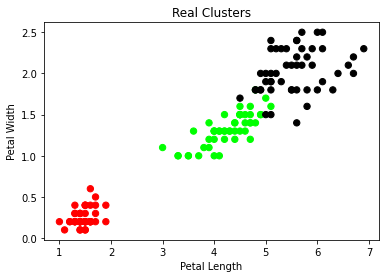

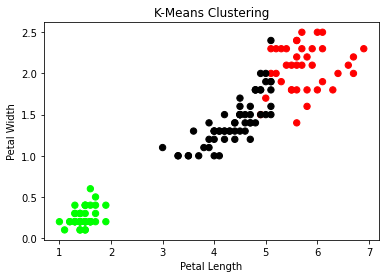

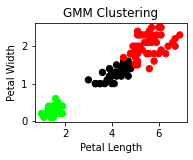

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns=['Targets']

# Build the K Means Model 
model = KMeans(n_clusters=3)
model.fit(X) 
# model.labels_  : Gives cluster no for which samples belongs to

# # Visualise the clustering results plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
# Plot the Original Classifications using Petal features plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Plot the Models Classifications plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# General EM for GMM
from sklearn import preprocessing
# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)


plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
plt.show()
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')


# EXNO - 9 K NEAREST NEIGHBOUR

In [ ]:
# import the required packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

# Load dataset 
iris=datasets.load_iris()
print("Iris Data set loaded...")

# Split the data into train and test samples
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of trainng data and its label",x_test.shape, y_test.shape)

# Prints Label no. and their names 
for i in range(len(iris.target_names)):
  print("Label", i , "-",str(iris.target_names[i]))
 

# Create object of KNN classifier
classifier = KNeighborsClassifier(n_neighbors=1)

# Perform Training 
classifier.fit(x_train, y_train) # Perform testing
y_pred=classifier.predict(x_test)

# Display the results
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
  print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",
str(y_pred[r]))
print("Classification Accuracy :" , classifier.score(x_test,y_test));

#from sklearn.metrics import classification_report, confusion_matrix #print('Confusion Matrix')
#print(confusion_matrix(y_test,y_pred)) #print('Accuracy Metrics') #print(classification_report(y_test,y_pred))


Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of trainng data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [5.2 4.1 1.5 0.1]  Actual-label: 0  Predicted-label: 0
 Sample: [5.7 3.8 1.7 0.3]  Actual-label: 0  Predicted-label: 0
 Sample: [7.2 3.2 6.  1.8]  Actual-label: 2  Predicted-label: 2
 Sample: [6.  3.  4.8 1.8]  Actual-label: 2  Predicted-label: 2
 Sample: [5.1 3.8 1.6 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.4 3.9 1.7 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [5.4 3.  4.5 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 2.5 4.9 1.5]  Actual-label: 1  Predicted-label: 2
 Sample: [6.4 3.2 5.3 2.3]  Actual-label: 2  Predicted-label: 2
 Sample: [5.7 2.5 5.  2. ]  Actual-label: 2  Predicted-label: 2
 Sample: [5.  3.6 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [7.7 2.8 6.7

# EXNO 10 - LOCALLY WEIGHTED REGRESSION ALGORITHM

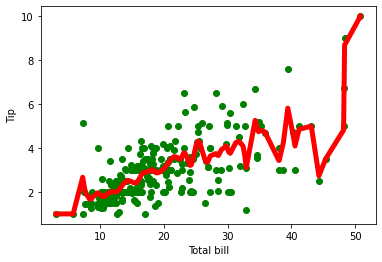

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

def kernel(point,xmat, k): 
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix 
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2)) 
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W

def localWeightRegression(xmat,ymat,k): 
    m,n = np.shape(xmat)
    ypred = np.zeros(m) 
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred
def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest 
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5) 
    plt.xlabel('Total bill')
    plt.ylabel('Tip') 
    plt.show();
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLT LAB/tips.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data   
tip = np.array(data.tip)

mbill = np.mat(bill) # .mat 
mtip = np.mat(tip)
m= np.shape(mbill)[1] 
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols

ypred = localWeightRegression(X,mtip,0.5) # increase k to get smooth curves
graphPlot(X,ypred)



